In [1]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
if torch.backends.mps.is_available():
    device= torch.device("mps")

In [5]:
#loading datasets
transform = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.MNIST(root='./data', train= True, download=True, transform=transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)


In [10]:
x0, _ = next(iter(loader))
x0 = x0.to(device)

x0.shape

torch.Size([1, 1, 28, 28])

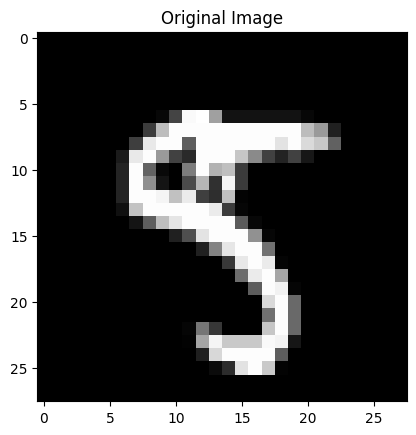

In [11]:
plt.imshow(x0.squeeze().cpu(), cmap='gray')
plt.title("Original Image")
plt.show()

In [12]:
#Adding diffusion function 
def get_alphas(timesteps):
    beta_start = 1e-4
    beta_end = 0.02
    betas = torch.linspace(beta_start, beta_end, timesteps)
    alphas = 1-betas
    alpha_cumprod = torch.cumprod(alphas, dim=0)
    return alpha_cumprod.to(device)


In [13]:
T = 1000
alphas_cumprod = get_alphas(T)

In [14]:
def forward_diffusion(x0, t):
    noise = torch.randn_like(x0)
    sqrt_alpha_cumprod = torch.sqrt(alphas_cumprod[t])[:,None, None, None]
    sqrt_one_minus_alpha_cumprod = torch.sqrt(1-alphas_cumprod[t])[:, None, None, None]
    return sqrt_alpha_cumprod * x0 + sqrt_one_minus_alpha_cumprod*noise, noise


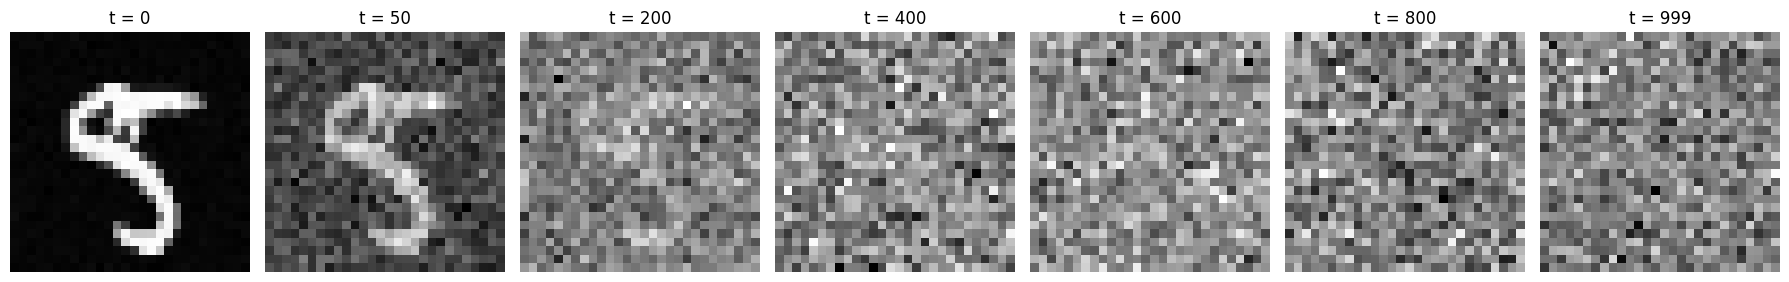

In [15]:
steps = [0, 50, 200, 400, 600, 800, 999]

fig, axs = plt.subplots(1, len(steps), figsize=(18,3))
for i, t in enumerate(steps):
    xt, _ = forward_diffusion(x0, torch.tensor([t]))
    axs[i].imshow(xt.squeeze().cpu(), cmap='gray')
    axs[i].set_title(f"t = {t}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()